# Recognition hand-written MNIST dataset with Decision tree


En este tutorial utilizaremos el algoritmo "Decision tree" para reconocer dígitos escritos a mano. El objetivo consiste en identificar un caracter a partir de una imagen digitalizada que se representa como un conjunto de pixeles.
En este caso se usará python (https://www.python.org) como lenguaje de programación y la librería SciKit (http://scikit-learn.org/stable/. Para la data usaremos el dataset de MNIST que se puede obtener en http://yann.lecun.com/exdb/mnist/. 

Para iniciar, se debe decargar los datasets de MNIST, en la misma raiz de este jupyter notebook, en una carpeta 'MNIST_data':
    - t10k-images-idx3-ubyte.gz
    - t10k-labels-idx1-ubyte.gz
    - train-images-idx3-ubyte.gz
    - train-labels-idx1-ubyte.gz

Abrir una instancia de CMD, para descomprimir la data, ejecutar:

    gzip *ubyte.gz -d

Paralelamente se usara el paquete MNIST que se puede instalar desde la consola usando el comando:

    pip install python-mnist

In [1]:
# importar las librerias

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

In [4]:
#importar el dataset

digits = datasets.load_digits()

# cargar la data de training (features -> images y labels -> labels)

images = digits.data
labels = digits.target

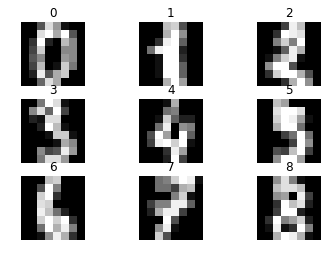

In [17]:
# vemos el contenido del data set, graficamos 25 imagenes del dataset de training

plt.gray()
for i in range(9):
    plt.subplot(3,3,i+1)
    
    d_image = images[i]
    d_image = np.array(d_image, dtype='float')
    pixels = d_image.reshape((8, 8))
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

Es importante evaluar el rendimiento de un clasificador, en nuestro caso utilizando el algoritmo Decision tree. A continuación un método para evaluar nuestro clasificador.

Introducimos los conceptos:

    -  Confusion matrix / Matrix de confusión
    -  Score / puntuación

In [18]:
# definimos una funcion para evaluar el clasificador

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    C = confusion_matrix(test_labels, pred)
    return C.diagonal().sum()*100./C.sum(),C

In [19]:
# Dividimos el dataset en:
#  -Datos de Entremamiento 70%  (features, labels)
#  -Datos de Testing  30%   (features y labels)

train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42)

Hora de entrenar nuestro __"CLASIFICADOR"__
Usamos de la librería SciKit-learn, el algoritmo ya definido de __Decision Tree__, que nos permite definir los siguientes "hiperparámetros"


criterion : The function to measure the quality of a split. Default "gini"

max_depth : The maximum depth of the tree

max_features : The number of features to consider when looking for the best split

Más info: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [20]:
# Entrenamiento del Arbol de decisiones
# definimos el clasificador

clf = DecisionTreeClassifier()

# entrenamos el clasificador
clf.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
# vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

s,C = evaluate_classifier(clf, test_data, test_labels)

# veremos el "score" y "confusion matrix" de nuestro clasificador elegido
print(s)
print(C)

87.22222222222223
[[15  0  0  0  1  1  0  0  0  0]
 [ 0  9  1  0  0  0  0  0  1  0]
 [ 0  0 15  0  0  0  0  1  0  1]
 [ 0  0  0 15  1  0  0  0  1  0]
 [ 0  0  0  0 22  0  1  2  0  0]
 [ 0  0  0  0  0 21  1  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  1  0  0  0  0  0 16  2  0]
 [ 0  0  0  0  0  0  0  0  6  2]
 [ 0  3  0  0  2  1  0  0  0 19]]


Antes de avanzar, podemos hacer un par de pruebas

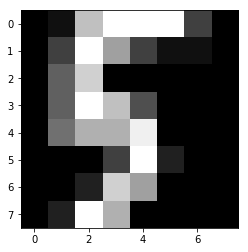

In [66]:
# Elegimos al azar una imagen del dataset de prueba. Index 8y lo graficamos para identificar q digito es

d = test_data[8]
d = np.array(d, dtype='float')
pixels = d.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

In [67]:
# Aplicamos el clasificador a este index para ver el resultado

print(clf.predict( [test_data[8]]))

[5]


Una vez nuestro clasificador este listo, podemos usar nuestro testing data

----------------------
Extra.

In [74]:
from scipy import misc

In [77]:
img = misc.imread("test/digit.jpg")
img = misc.imresize(img,(8,8))
img = img.astype(digits.images.dtype)
img = misc.bytescale(img, high=16, low=0)

digit_test = []

for eachRow in img:
    for eachPixel in eachRow:
        digit_test.append(sum(eachPixel)/3)

        
print(clf.predict( [digit_test]))

[6]


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  after removing the cwd from sys.path.


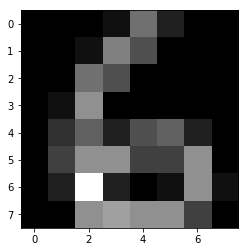

In [78]:
d = digit_test
d = np.array(d, dtype='float')
pixels = d.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()